In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', dpi=300)
df = pd.read_csv('iris.csv')
df.info()
#print(plt.style.available)
plt.style.use('dark_background')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_len  150 non-null    float64
 1   sep_wid  150 non-null    float64
 2   pet_len  150 non-null    float64
 3   pet_wid  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
df.isnull().sum()

sep_len    0
sep_wid    0
pet_len    0
pet_wid    0
species    0
dtype: int64

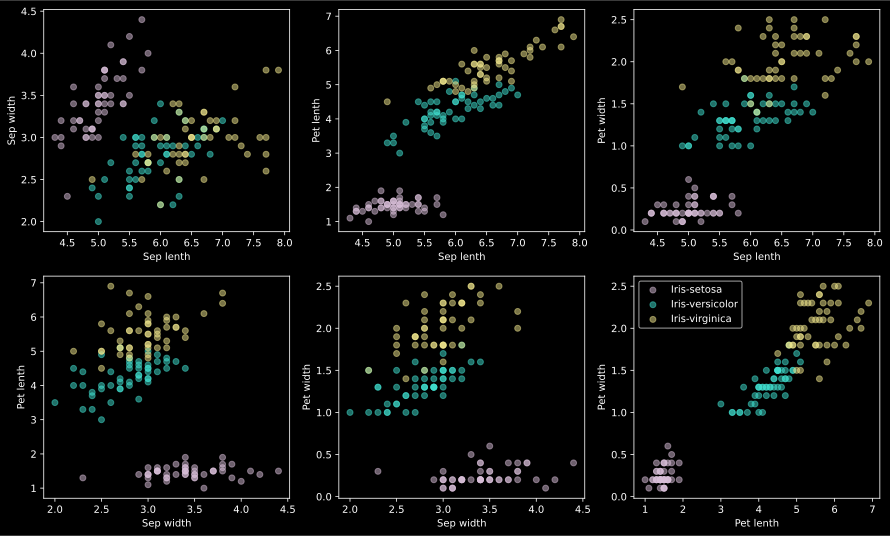

In [3]:
x = df[['sep_len', 'sep_wid', 'pet_len', 'pet_wid']] # features
y = df['species'] # targets
features = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid']
species = df.species.unique()
#data-visualization
colors = ['thistle', 'turquoise', 'khaki']
plt.subplots(figsize=(15,9))
dsource = df
group = df.groupby('species')
count = 1
for i in range(len(features)-1):
   #plt.scatter(dsource[features[i]], dsource[features[i+1]])
    for k in range(len(features)-i-1):
        plt.subplot(2, 3, count)
        count+=1
        for j in range(len(species)):
            spec = dsource[dsource['species'] == species[j]]
            plt.scatter(spec[features[i]], spec[features[k+i+1]], c=colors[j], label=species[j], alpha = 0.5)
        plt.xlabel(features[i].replace('_', ' ').capitalize()+'th')
        plt.ylabel(features[k+i+1].replace('_', ' ').capitalize()+'th')
plt.legend(loc='best')

plt.show()

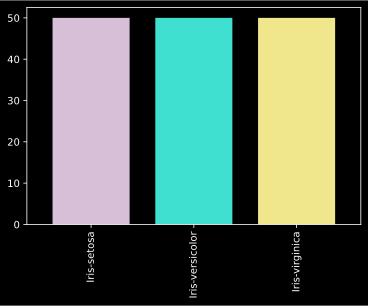

In [4]:
counts = df['species'].value_counts().sort_index()
counts.plot.bar(width=0.75, color = colors)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

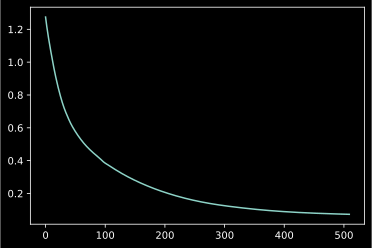

In [6]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(max_iter=1000)
MLPC.fit(x_train, y_train)
plt.plot(MLPC.loss_curve_)
plt.show()

In [7]:
score = MLPC.score(x_test, y_test)
print(score)

0.9777777777777777
